# Uso da yolo

Imagem escolhida: dataset/images/test/702_image.png


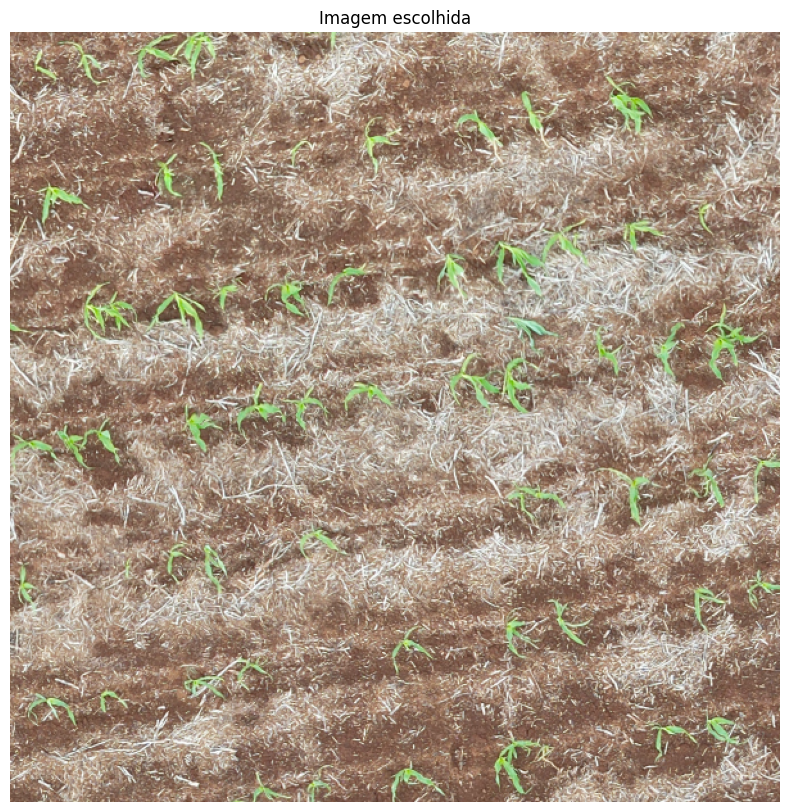

In [7]:
import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt

# Caminho para a pasta de teste
test_folder = 'dataset/images/test'
imagens_test = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
img_nome = random.choice(imagens_test)
img_path = os.path.join(test_folder, img_nome)
print(f'Imagem escolhida: {img_path}')

# Carrega imagem original
img = cv2.imread(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagem escolhida')
plt.show()

# Segmentando Plantas


image 1/1 /home/angelo/Documents/yolotests/dataset/images/test/702_image.png: 608x608 57 milhos, 951.8ms
Speed: 4.2ms preprocess, 951.8ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 608)


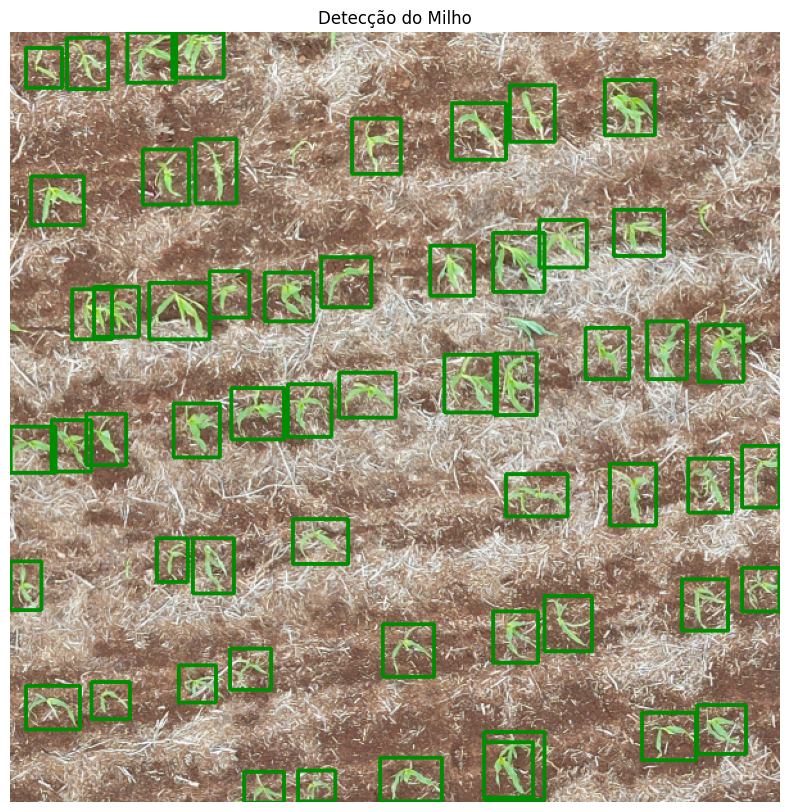

In [8]:

# Carrega o modelo
model = YOLO('v8s_augmentado.pt')
results = model(img_path)[0]

# Obtem as bounding boxes (xyxy), confidences e classes
boxes = results.boxes.xyxy.cpu().numpy()  # (x1, y1, x2, y2)
scores = results.boxes.conf.cpu().numpy()
classes = results.boxes.cls.cpu().numpy().astype(int)

# Verifica sobreposição
def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou


# Desenha as caixas e centros
for idx, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)

    if classes[idx]:
        color = (0, 140, 255) 
    else:
        color=(0, 140, 0)
    # Desenhar bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    

# Exibe com matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detecção do Milho')
plt.show()

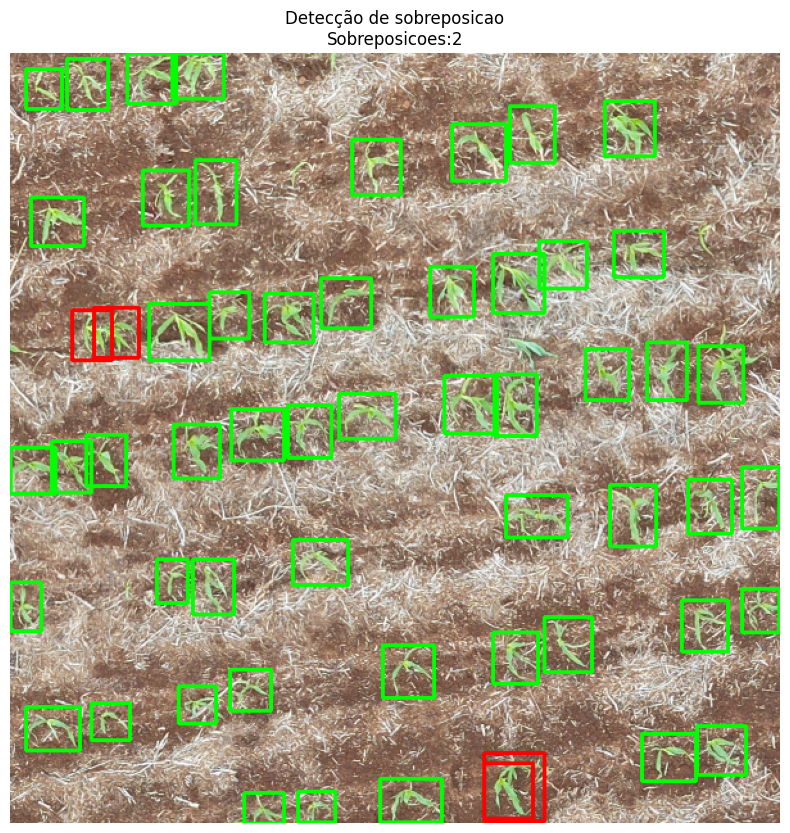

In [9]:
img = cv2.imread(img_path)
# Verifica sobreposição
def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

# Verifica quais caixas se sobrepõem
overlapping_indices = set()
for i in range(len(boxes)):
    for j in range(i + 1, len(boxes)):
        if iou(boxes[i], boxes[j]) > 0.1:  # limiar ajustável
            overlapping_indices.add(i)
            overlapping_indices.add(j)

# Desenha as caixas
cont = 0
for idx, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    if idx in overlapping_indices:
        color = (0, 0, 255)
        cont+=1
    else:
        color = (0, 255, 0)
    if classes[idx]:
        color = (0, 140, 255)  # opcional: laranja se for outra classe
    
    # Desenhar bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    
# Exibe com matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Detecção de sobreposicao\nSobreposicoes:{int(cont/2)}')
plt.show()


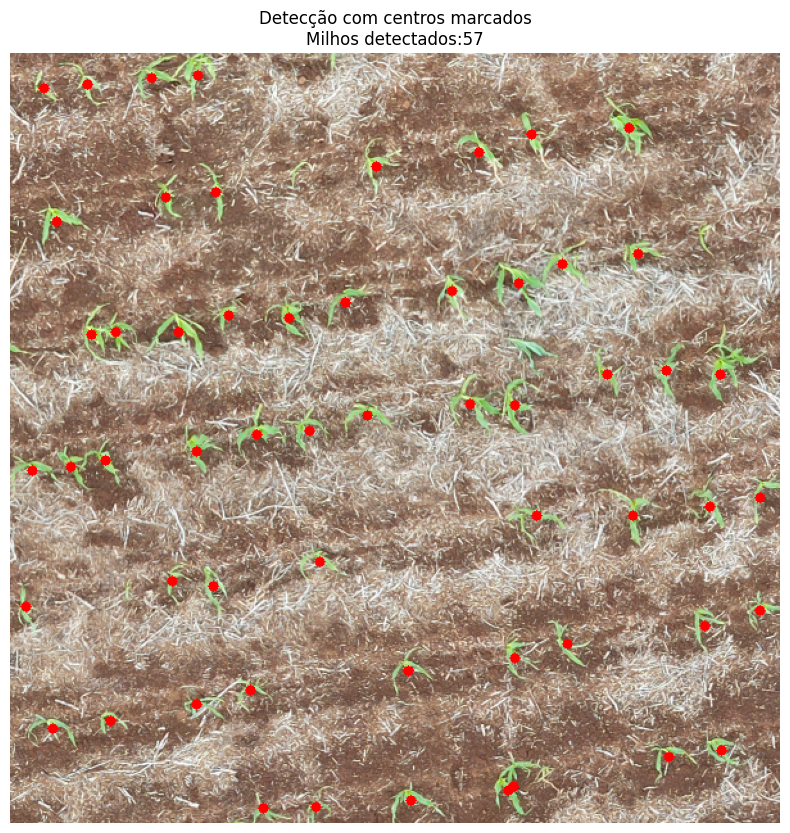

In [10]:
img = cv2.imread(img_path)
# Desenha as caixas e centros
plantas = []
for idx, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    if not classes[idx]:
        # Apenas milho    
        # Calcular centro e desenhar ponto roxo
        center_x = int((x1 + x2) / 2)
        center_y = int((y1 + y2) / 2)
        plantas.append((center_x, center_y))
        cv2.circle(img, (center_x, center_y), radius=4, color=(0, 0, 255), thickness=-1)  # vermelho

# Exibe com matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Detecção com centros marcados\nMilhos detectados:{len(plantas)}')
plt.show()



[(312, 582), (131, 217), (146, 17), (33, 526), (36, 131), (278, 282), (158, 415), (192, 297), (233, 294), (388, 574), (485, 360), (393, 274), (393, 471), (47, 322), (310, 481), (197, 588), (541, 446), (17, 325), (434, 460), (365, 77), (554, 543), (160, 108), (217, 206), (110, 19), (344, 185), (545, 353), (60, 24), (513, 548), (511, 247), (74, 317), (406, 63), (358, 273), (145, 310), (465, 250), (261, 194), (121, 112), (584, 346), (553, 250), (430, 164), (78, 520), (238, 587), (482, 58), (489, 156), (241, 396), (187, 496), (285, 88), (170, 204), (584, 434), (126, 411), (396, 179), (12, 431), (410, 360), (82, 217), (63, 219), (392, 571), (145, 507), (26, 27)]
[30, 242, 416, 576]
4
-6.581944655178011


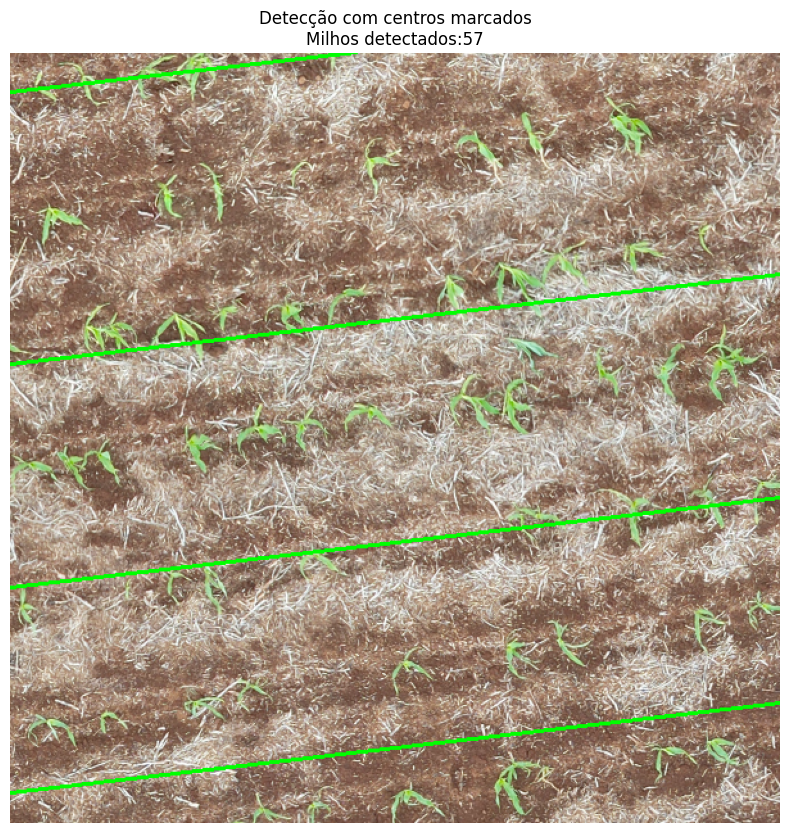

In [11]:
import statistics
import math
print(plantas)
img = cv2.imread(img_path)
def distance(a,b):
    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]
    return ((x1-x2)**2+(y1-y2)**2)**0.5
# Sintaxe: cv2.line(imagem, ponto_inicial, ponto_final, cor, espessura)
# cv2.line(img, (100, 100), (400, 400), (0, 255, 0), 2)
DIRECOES = set()
for point in plantas:
    for piontb in plantas:
        dist = distance(point,piontb)
        if dist < 70 and dist > 40:
            if not (piontb,point) in DIRECOES:
                DIRECOES.add((point,piontb))
angulos = []
biases = []
def calcule(direction):
    (x1, y1), (x2, y2) = direction
    dx = x2 - x1
    dy = y2 - y1
    angulo_rad = math.atan2(dy, dx)
    angulo_graus = math.degrees(angulo_rad)

    if dx != 0:
        a = dy / dx  # coeficiente angular
        bias = y1 - a * x1  # intercepto (bias)
    else:
        a = float('inf')  # reta vertical
        bias = x1  # intercepto no eixo x (reta x = constante)

    return angulo_graus, bias
for diretion in DIRECOES:
    angulo,bias= calcule(diretion)
    angulos.append(angulo)
    biases.append(bias)
    # cv2.line(img, diretion[0], diretion[1], (0, 255, 0), 2)
def cluster_por_distancia(lista, distancia_max=3):
    lista = sorted(lista)
    clusters = [[lista[0]]]

    for val in lista[1:]:
        if abs(val - clusters[-1][-1]) <= distancia_max:
            clusters[-1].append(val)
        else:
            clusters.append([val])
    return clusters
clusters = cluster_por_distancia(biases,60)
biases = [int(statistics.median(group)) for group in clusters if int(statistics.median(group))>0 and int(statistics.median(group))<600]
print(biases)

print(len(biases))

angulo = statistics.median(angulos)



# angulo = angulo if angulo > 0 else angulo * (-1)
print(angulo)
def trace(angulo_graus, bias, largura_img):
    angulo_rad = math.radians(angulo_graus)

    # calcula a inclinação a = tan(θ)
    a = math.tan(angulo_rad)

    # calcula dois pontos extremos no eixo x
    x1 = 0
    y1 = int(a * x1 + bias)

    x2 = largura_img
    y2 = int(a * x2 + bias)

    return (x1, y1), (x2, y2)
for bias in biases:
    point,piontb = trace(angulo,bias,600)
    cv2.line(img, point, piontb, (0, 255, 0), 2)
# point,piontb = trace(angulo)

# cv2.line(img, point, piontb, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Detecção com centros marcados\nMilhos detectados:{len(plantas)}')
plt.show()